# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Обратите внимание: в этом и во всех последующих дз за написание неоптимального кода баллы могут быть снижены. Это, в частности, относится к случаям, когда что-то можно сделать при помощи инструментов библиотек и не использовать циклы. Если вам совсем непонятно, как оптимально решить то или иное задание, посоветуйтесь с вашими семинаристами или ассистентами.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [6]:
#your code here
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [7]:
#your code here
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [5]:
#your code here
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [7]:
#your code here
Data = Data[Data.Sex != 'unknown']

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [9]:
#your code here
Data['Sex'].value_counts()

Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
Data['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

Посмотрим, как влияет пол на выживаемость.

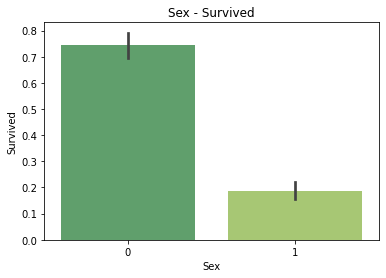

In [10]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

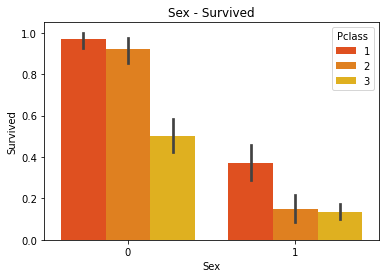

In [12]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

/home/ksusonic/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


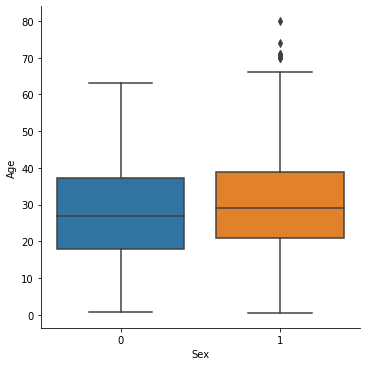

In [13]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box")
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

/home/ksusonic/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


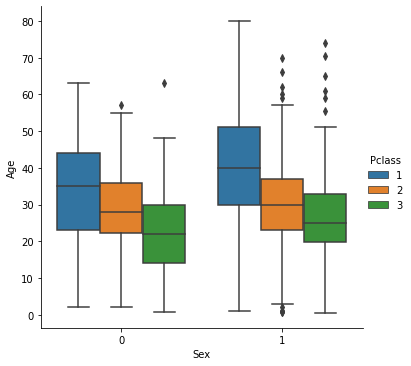

In [14]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [15]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [16]:
#your code here

Переведем категориальный столбец в числовые с помощью OneHotEncoding, а именно, создадим три числовых столбца следующим образом:

In [17]:
# Data['EmbS'] = Data.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# Data['EmbC'] = Data.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# Data['EmbQ'] = Data.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

Эту операцию можно сделать с помощью метода get_dummies.

In [18]:
pd.get_dummies(Data['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


**Задание 7.** Удалите из таблицы Data категориальный столбец Embarked и добавьте в неё новые столбцы, полученные с помощью get_dummies.

In [19]:
#your code here

**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [20]:
#your code here

Заполним пропуски медианным значением Age.

In [21]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

/home/ksusonic/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


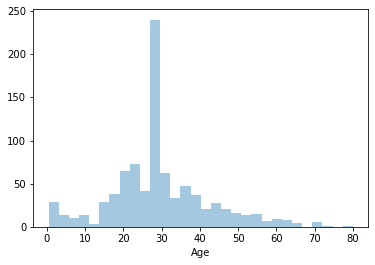

In [22]:
sns.distplot(Data['Age'], kde=False)
plt.show()

Посмотрим на распределение Pclass по возрастам.

/home/ksusonic/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


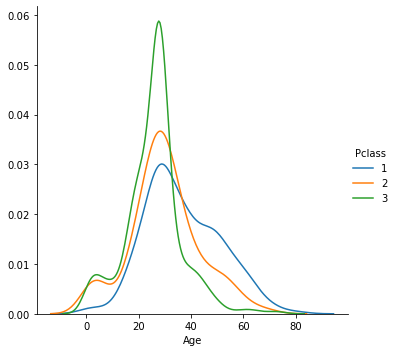

In [23]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [24]:
#your code here

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [ ]:
Data['Pclass'].value_counts(dropna=False)

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

In [ ]:
#your code here

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [ ]:
Data['SibSp'].value_counts(dropna=False)

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [ ]:
Data['Parch'].value_counts(dropna=False)

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [ ]:
#your code here

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [ ]:
#your code here

NumericData = ...

NameError: name 'NumericData' is not defined

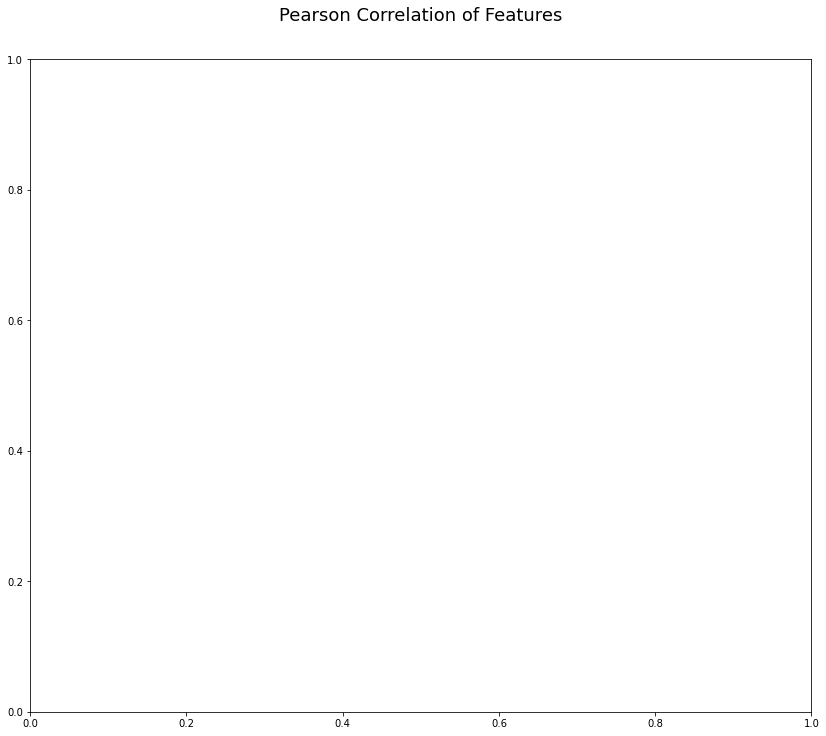

In [11]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/home/ksusonic/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


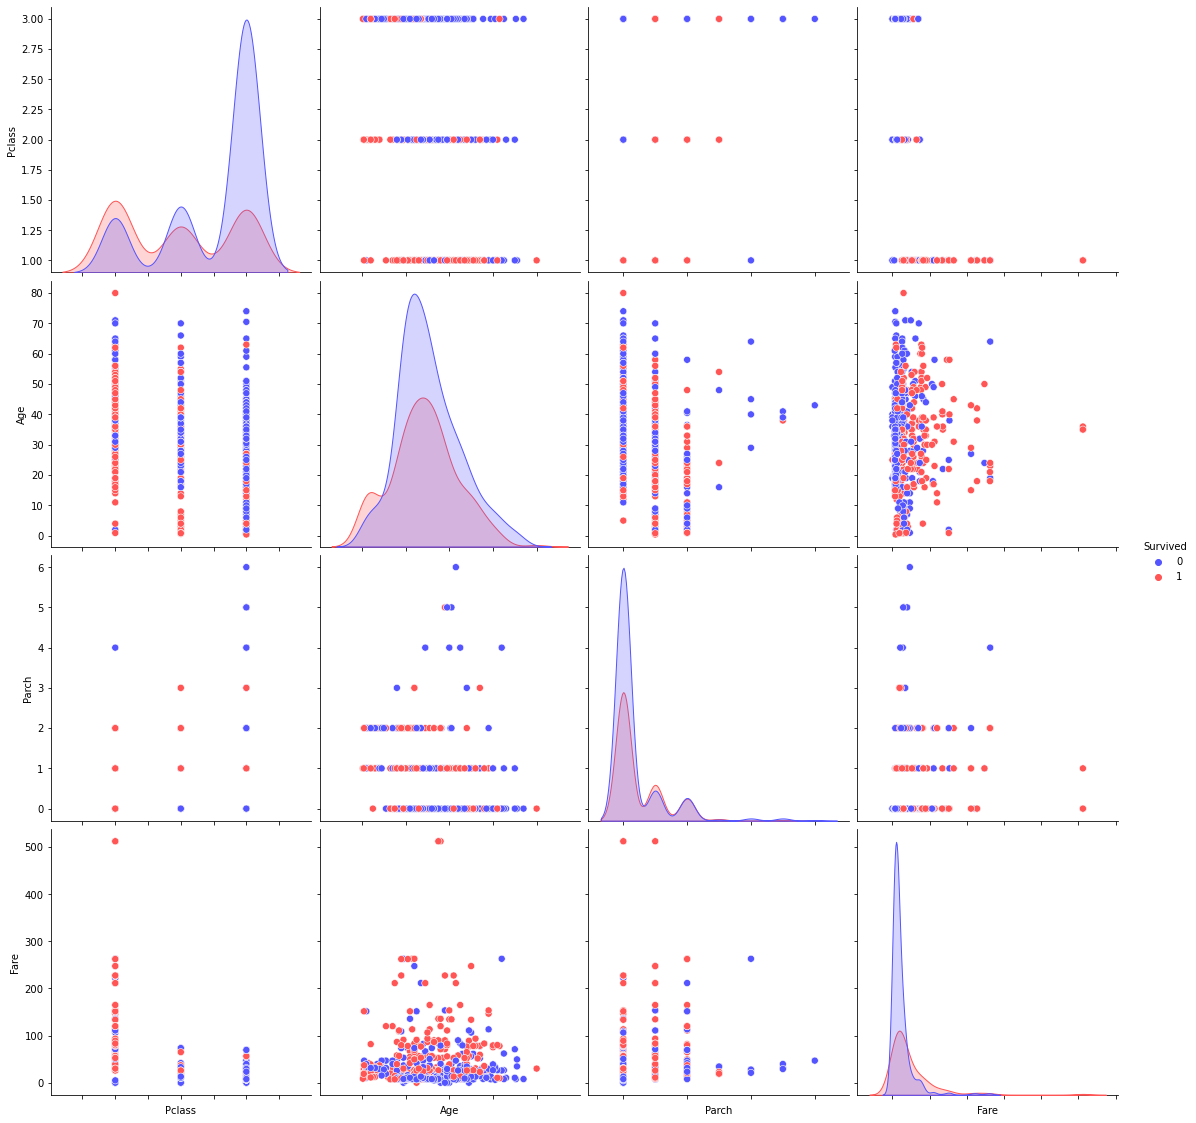

In [8]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [4]:
Data['AgeBin']

KeyError: 'AgeBin'

In [ ]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [ ]:
#your code here

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [ ]:
#Your code here

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [ ]:
#your code here

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

In [ ]:
#your answer here